In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv("D:\downloads\heart_disease_data.csv")
heart_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kanav\AppData\Local\Temp\ipykernel_8288\1087246335.py:1: SyntaxWarning: invalid escape sequence '\d'
  heart_data = pd.read_csv("D:\downloads\heart_disease_data.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.shape

(303, 14)

In [4]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

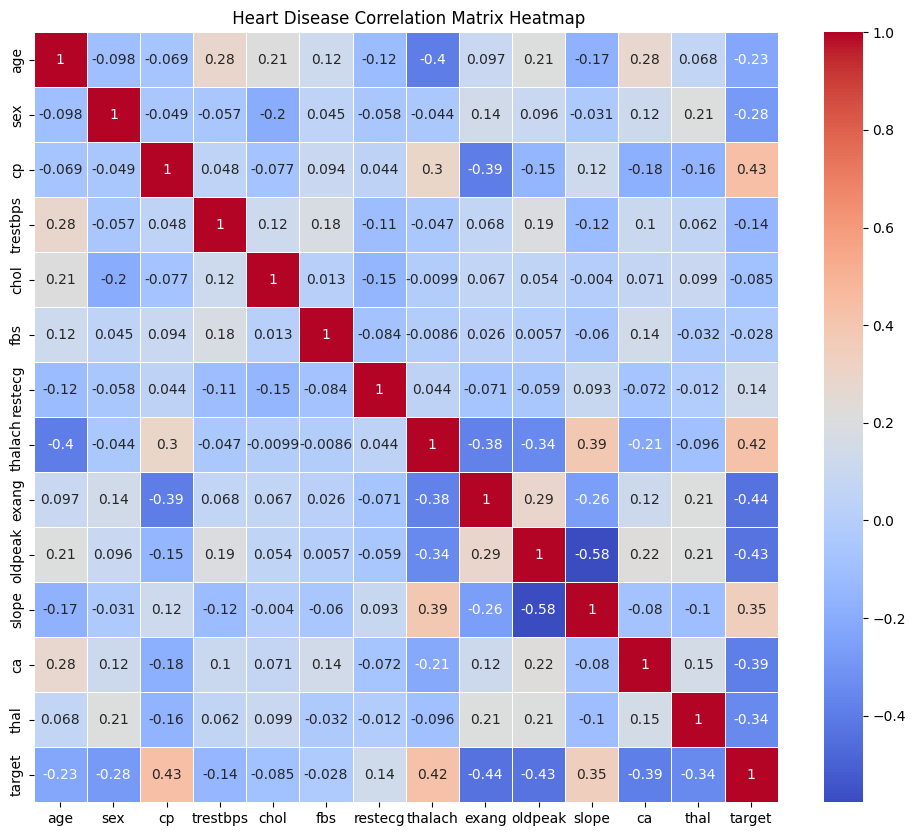

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = heart_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' Heart Disease Correlation Matrix Heatmap')
plt.show()

In [18]:
heart_data.head()

AttributeError: 'DataFrame' object has no attribute 'head9'

In [9]:

X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)



from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)



model = LogisticRegression()
model.fit(X_train, Y_train)

c:\Users\kanav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data_LogicalRegression: ', training_data_accuracy)

X_train_prediction2 = rf_model.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy on Training data_RandomForest : ', training_data_accuracy2)

X_train_prediction3 = classifier.predict(X_train)
training_data_accuracy3 = accuracy_score(X_train_prediction3, Y_train)
print('Accuracy on Training data_SVM : ', training_data_accuracy3)


Accuracy on Training data_LogicalRegression:  0.8512396694214877
Accuracy on Training data_RandomForest :  1.0
Accuracy on Training data_SVM :  0.8553719008264463


In [12]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on tesing data_LogicalRegression: ', testing_data_accuracy)

X_testing_prediction2 = rf_model.predict(X_test)
testing_data_accuracy2 = accuracy_score(X_testing_prediction2, Y_test)
print('Accuracy on testing data_RandomForest : ', testing_data_accuracy2)

X_testing_prediction3 = classifier.predict(X_test)
testing_data_accuracy3 = accuracy_score(X_testing_prediction3, Y_test)
print('Accuracy on Testing data_SVM : ', testing_data_accuracy3)


Accuracy on tesing data_LogicalRegression:  0.819672131147541
Accuracy on testing data_RandomForest :  0.8032786885245902
Accuracy on Testing data_SVM :  0.819672131147541


In [13]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


c:\Users\kanav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
import pickle

filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [15]:
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))